# Lab, Wednesday

###     Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample

pd.set_option('display.max_columns', None)

###     Read that data into Python and call the dataframe donors.


In [2]:
num = pd.read_csv('numerical7_02.csv')
cat = pd.read_csv('categorical7_02.csv')
Y = pd.read_csv('target7_02.csv')

In [3]:
num.drop(columns = ['Unnamed: 0'], inplace = True)

In [4]:
cat.drop(columns = ['Unnamed: 0'], inplace = True)

In [5]:
Y.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
#cat

In [7]:
donors = pd.concat([num, cat], axis = 1)

###     Check the datatypes of all the columns in the data.


In [8]:
donors.dtypes.value_counts()

int64      312
float64     14
object       9
dtype: int64

###     Check for null values in the dataframe. Replace the null values using the methods learned in class.


In [9]:
checker = pd.DataFrame(donors.isna().sum()).reset_index()

In [10]:
checker[checker[0]>0]

,index,0
135,MSA,132
137,DMA,132


In [11]:
donors['MSA'].value_counts()

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 298, dtype: int64

In [12]:
donors['MSA'] = donors['MSA'].fillna(0.0)

In [13]:
donors['MSA'].isna().sum()

0

In [14]:
donors['DMA'].value_counts()

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 206, dtype: int64

In [15]:
donors['DMA'] = donors['DMA'].fillna(803.0)

### Next, I will take the liberty of weeding out the numerical features, using the methods shown in yesterday's class.

(Found out that this might be useful when I tried to plot all of the numerical columns to identify hidden categoricals that need changed dtypes - plotting 300+ columns with almost 100,000 values each is a big task)

I'll be lazy and use the list of low variance columns generated in Jan's notebook. I could generate it again, but that would amount to copy-pasting that code as well, so I'll be smart and steal his list. 

In [16]:
droplist = ['TCODE',
 'HIT',
 'MALEMILI',
 'MALEVET',
 'LOCALGOV',
 'STATEGOV',
 'FEDGOV',
 'POP901',
 'POP902',
 'POP903',
 'POP90C4',
 'POP90C5',
 'ETH3',
 'ETH4',
 'ETH5',
 'ETH6',
 'ETH7',
 'ETH8',
 'ETH9',
 'ETH10',
 'ETH11',
 'ETH12',
 'ETH13',
 'ETH14',
 'ETH15',
 'ETH16',
 'AGE901',
 'AGE902',
 'AGE903',
 'AGE904',
 'AGE905',
 'AGE906',
 'AGE907',
 'CHIL1',
 'CHIL2',
 'CHIL3',
 'AGEC1',
 'AGEC2',
 'AGEC3',
 'AGEC4',
 'AGEC5',
 'AGEC6',
 'AGEC7',
 'CHILC1',
 'CHILC2',
 'CHILC3',
 'CHILC4',
 'CHILC5',
 'HHAGE1',
 'HHAGE2',
 'HHAGE3',
 'HHN1',
 'HHN2',
 'HHN4',
 'HHN5',
 'HHN6',
 'MARR1',
 'MARR2',
 'MARR3',
 'MARR4',
 'HHP1',
 'HHP2',
 'DW3',
 'DW7',
 'DW8',
 'DW9',
 'HU3',
 'HU4',
 'HHD1',
 'HHD4',
 'HHD6',
 'HHD7',
 'HHD8',
 'HHD9',
 'HHD10',
 'HHD11',
 'HHD12',
 'ETHC1',
 'ETHC3',
 'ETHC4',
 'ETHC5',
 'ETHC6',
 'HUR1',
 'RHP1',
 'RHP2',
 'RHP3',
 'RHP4',
 'HUPA1',
 'HUPA4',
 'HUPA5',
 'HUPA7',
 'DMA',
 'IC1',
 'IC2',
 'IC3',
 'IC4',
 'IC5',
 'IC7',
 'IC8',
 'IC9',
 'IC10',
 'IC11',
 'IC12',
 'IC13',
 'IC14',
 'IC15',
 'IC16',
 'IC17',
 'IC18',
 'IC19',
 'IC20',
 'IC21',
 'IC22',
 'IC23',
 'HHAS1',
 'HHAS2',
 'HHAS4',
 'MC3',
 'TPE1',
 'TPE2',
 'TPE3',
 'TPE4',
 'TPE5',
 'TPE6',
 'TPE7',
 'TPE8',
 'TPE9',
 'PEC1',
 'TPE10',
 'TPE11',
 'TPE12',
 'LFC1',
 'LFC3',
 'LFC5',
 'LFC10',
 'OCC1',
 'OCC2',
 'OCC3',
 'OCC4',
 'OCC5',
 'OCC6',
 'OCC7',
 'OCC8',
 'OCC9',
 'OCC10',
 'OCC11',
 'OCC12',
 'OCC13',
 'EIC1',
 'EIC2',
 'EIC3',
 'EIC4',
 'EIC5',
 'EIC6',
 'EIC7',
 'EIC8',
 'EIC9',
 'EIC10',
 'EIC11',
 'EIC12',
 'EIC13',
 'EIC14',
 'EIC15',
 'EIC16',
 'OEDC1',
 'OEDC2',
 'OEDC3',
 'OEDC4',
 'OEDC5',
 'OEDC6',
 'OEDC7',
 'EC1',
 'EC2',
 'EC3',
 'EC4',
 'EC5',
 'EC6',
 'EC7',
 'EC8',
 'SEC1',
 'SEC2',
 'SEC3',
 'SEC4',
 'SEC5',
 'AFC1',
 'AFC2',
 'AFC3',
 'AFC4',
 'AFC5',
 'AFC6',
 'VC2',
 'VC4',
 'ANC1',
 'ANC2',
 'ANC3',
 'ANC4',
 'ANC5',
 'ANC6',
 'ANC7',
 'ANC8',
 'ANC9',
 'ANC10',
 'ANC11',
 'ANC12',
 'ANC13',
 'ANC14',
 'ANC15',
 'POBC1',
 'LSC2',
 'LSC3',
 'LSC4',
 'VOC1',
 'VOC3',
 'HC1',
 'HC3',
 'HC9',
 'HC10',
 'HC12',
 'HC14',
 'HC15',
 'HC16',
 'HC20',
 'HC21',
 'AC1',
 'AC2',
 'NUMPROM',
 'CARDPM12',
 'NUMPRM12',
 'RAMNTALL',
 'NGIFTALL',
 'CARDGIFT',
 'MINRAMNT',
 'MAXRAMNT',
 'LASTGIFT',
 'TIMELAG',
 'AVGGIFT']

In [17]:
donors.drop(columns = droplist, inplace = True)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(donors, Y,
                                                   test_size = 0.2, random_state = 111)

In [19]:
Y_train['TARGET_B'].value_counts()

0    72464
1     3865
Name: TARGET_B, dtype: int64

In [20]:
# I'm also going to assume that there is a single y value that we want.
# Since the assignment later on is to do a LOGISTIC regression, I'll use TARGET_B


y_train = Y_train['TARGET_B']
y_test = Y_test['TARGET_B']

In [21]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)

In [23]:
scaler = StandardScaler().fit(X_train_num)

In [24]:
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

###     Split the data into numerical and catagorical. Decide if any columns need their dtype changed.


/Users/work/Library/Python/3.10/lib/python/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


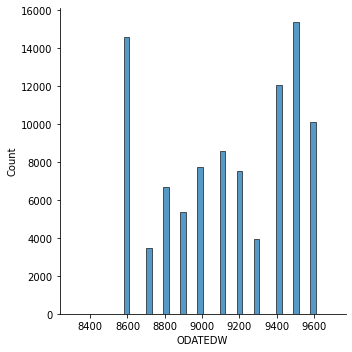

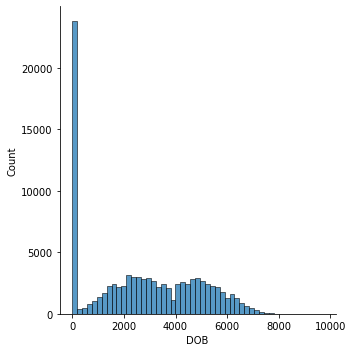

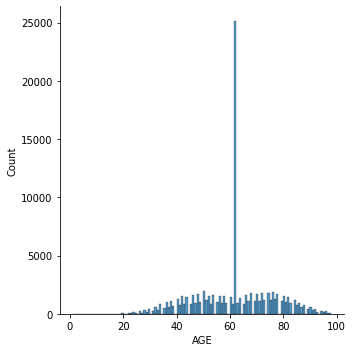

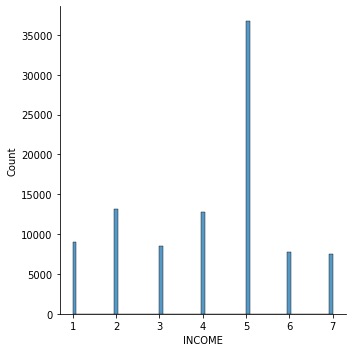

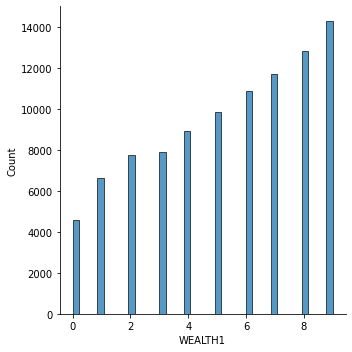

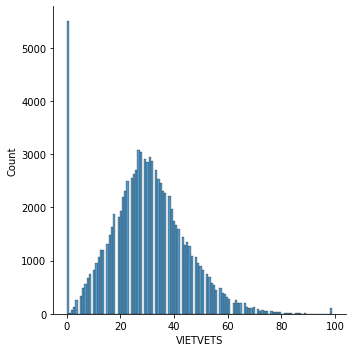

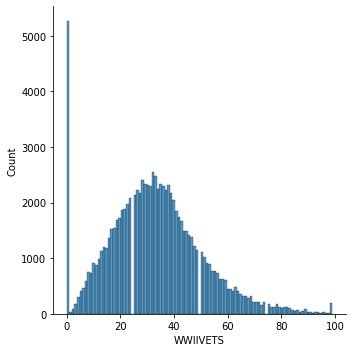

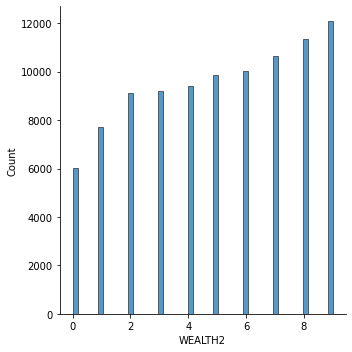

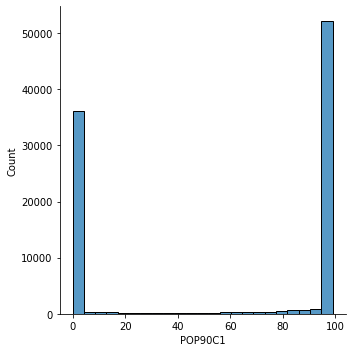

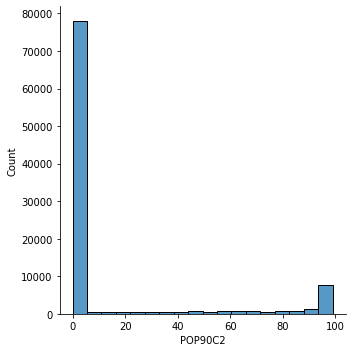

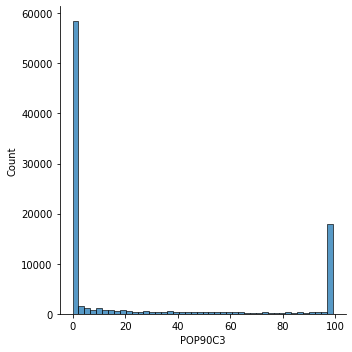

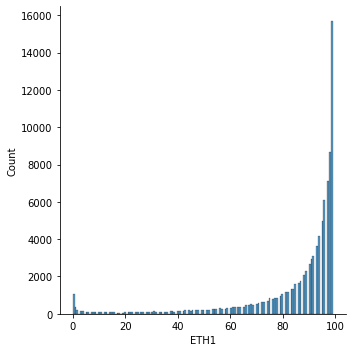

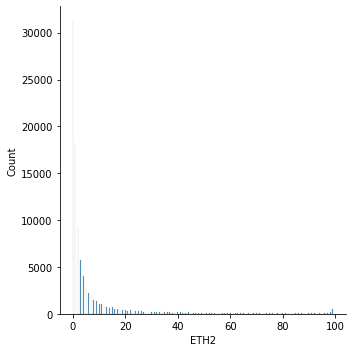

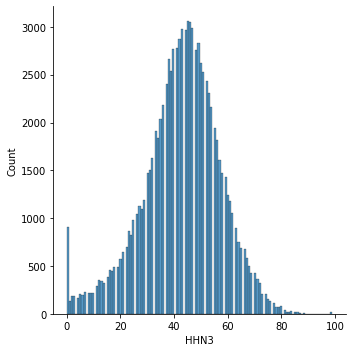

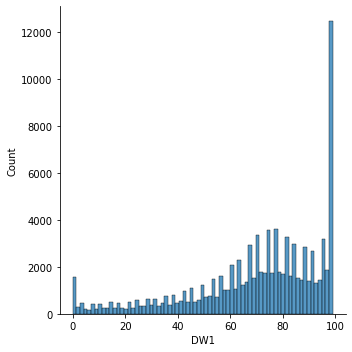

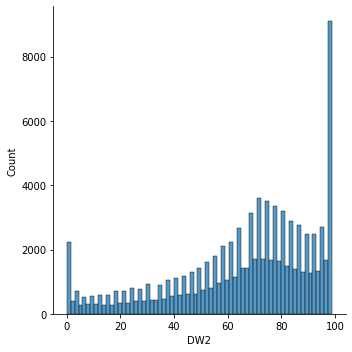

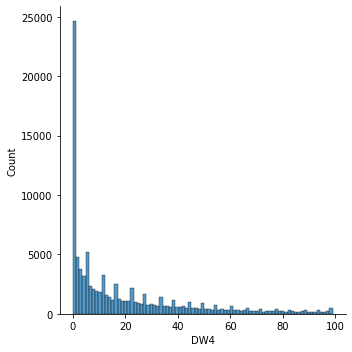

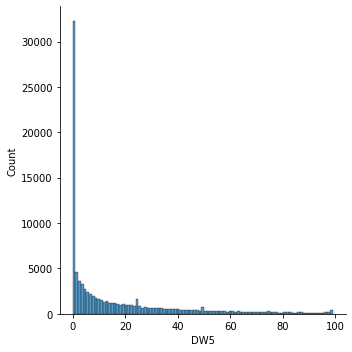

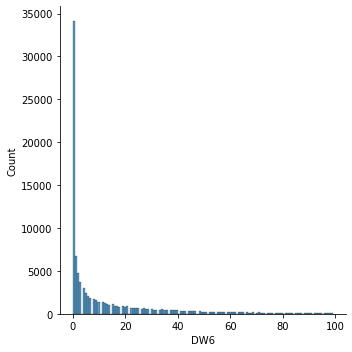

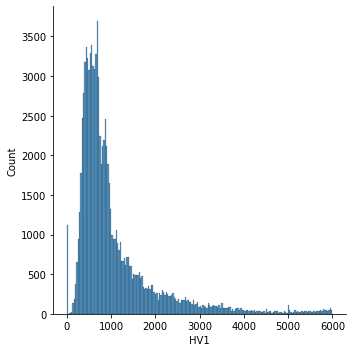

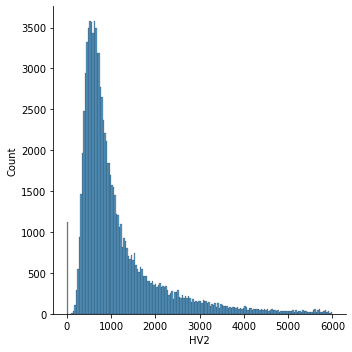

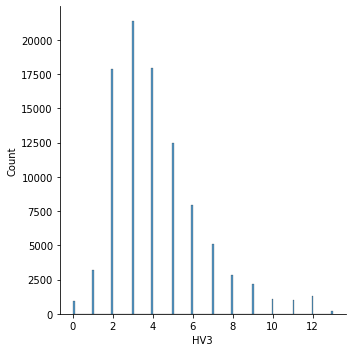

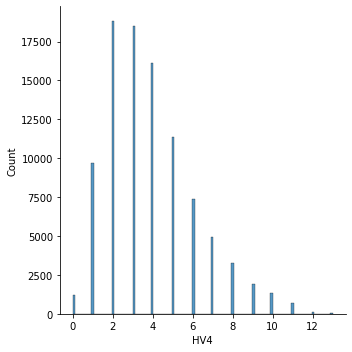

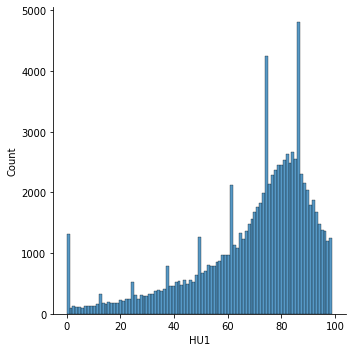

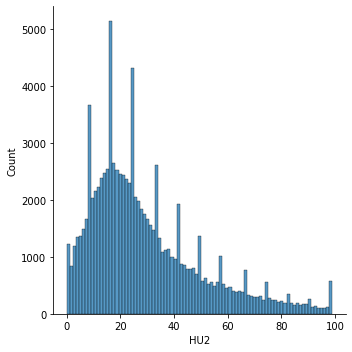

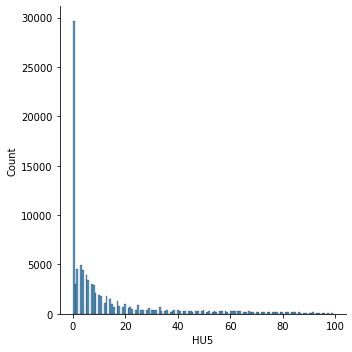

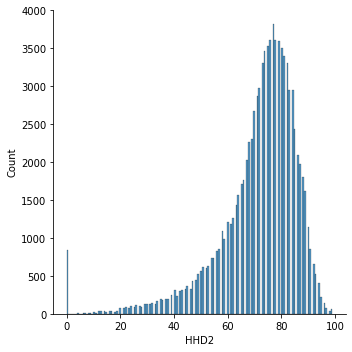

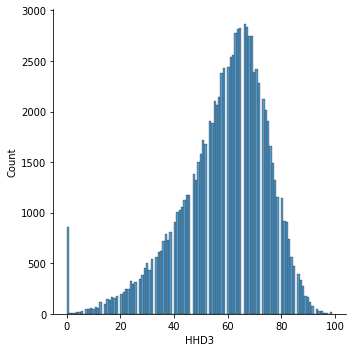

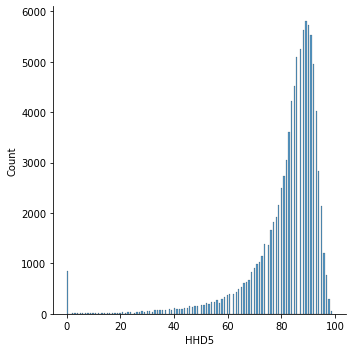

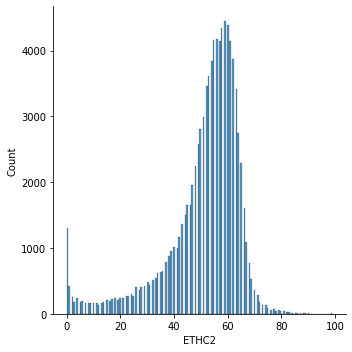

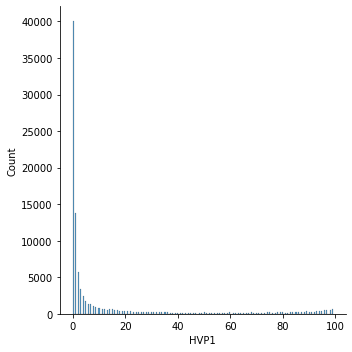

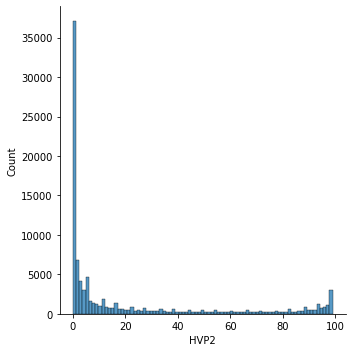

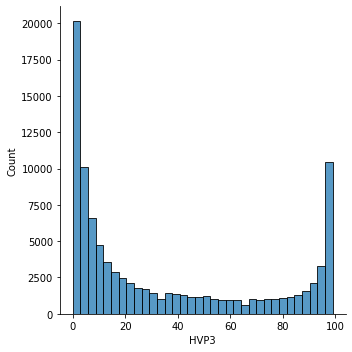

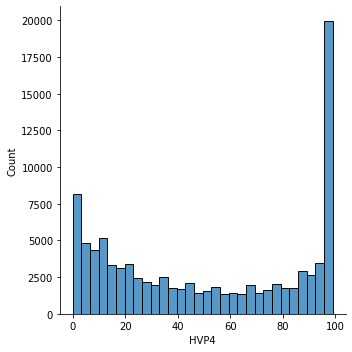

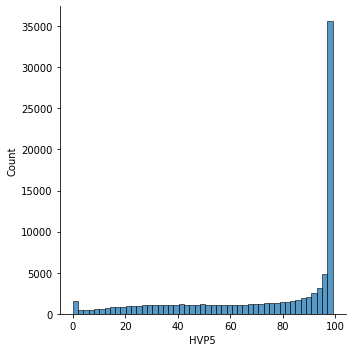

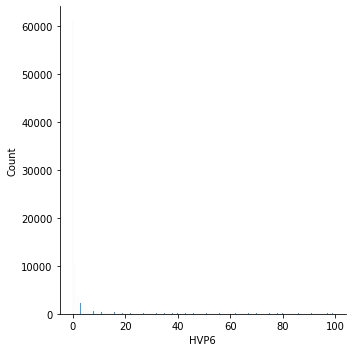

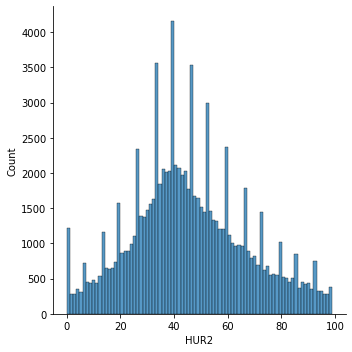

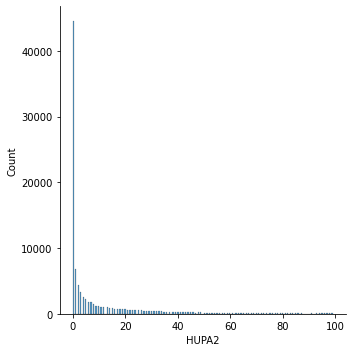

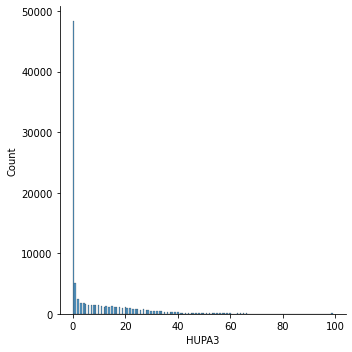

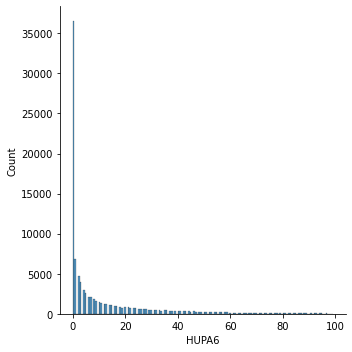

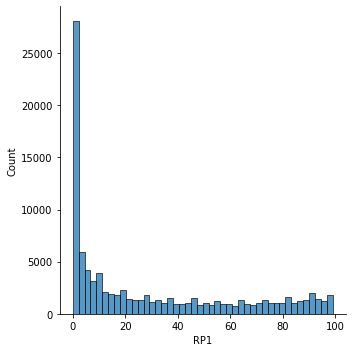

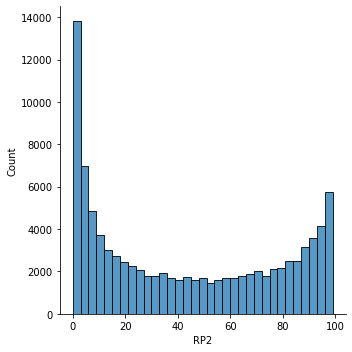

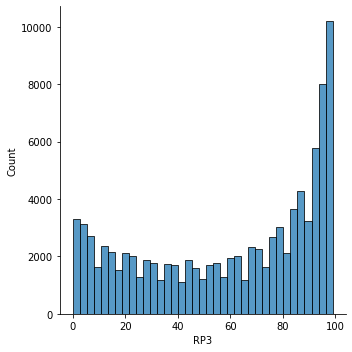

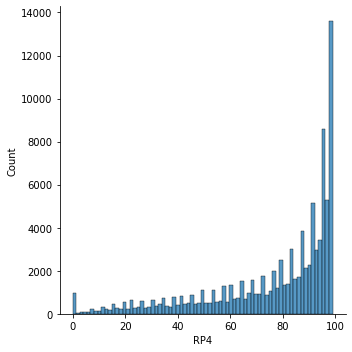

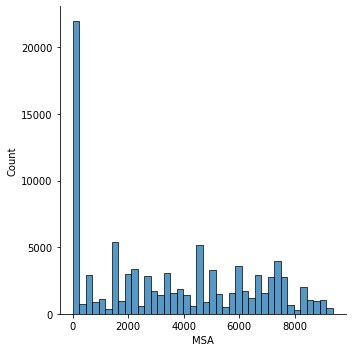

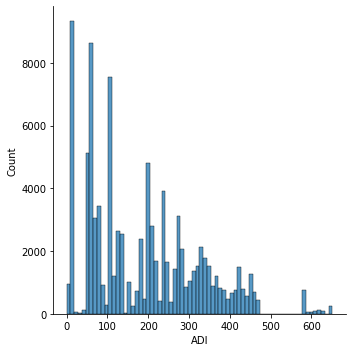

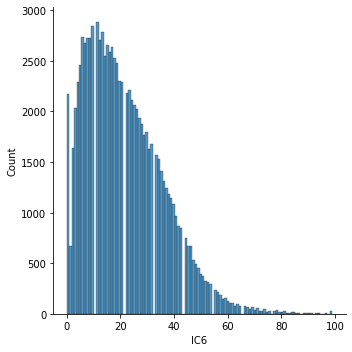

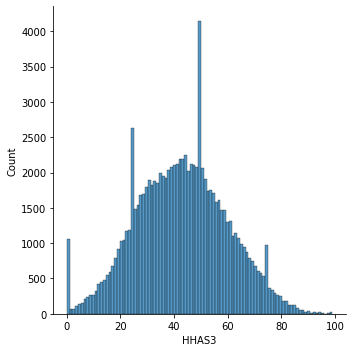

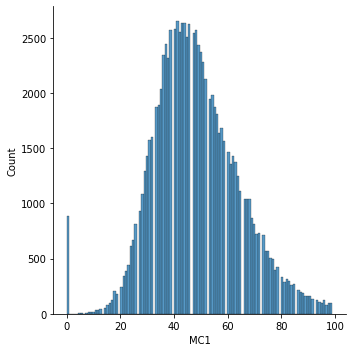

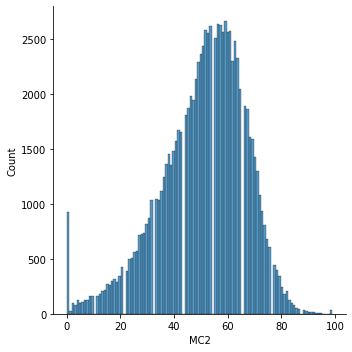

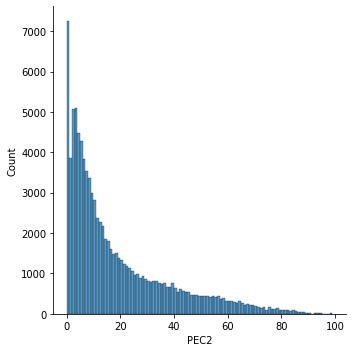

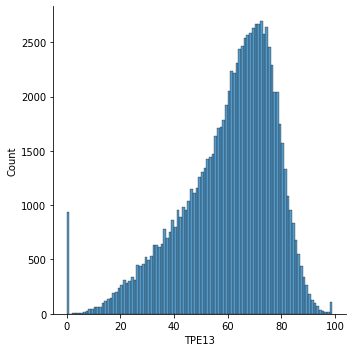

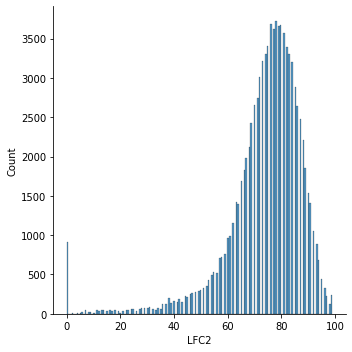

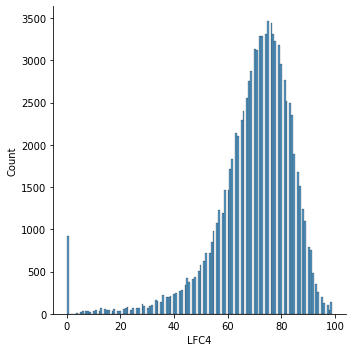

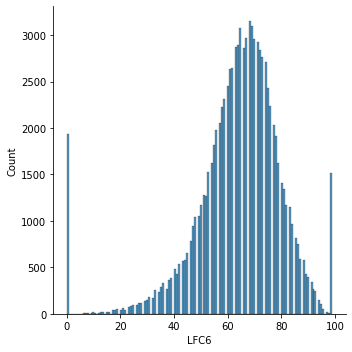

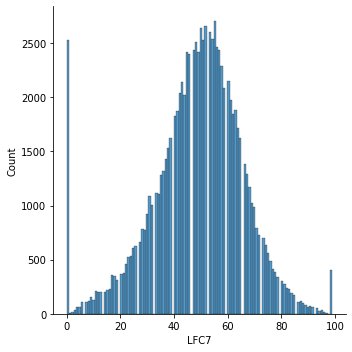

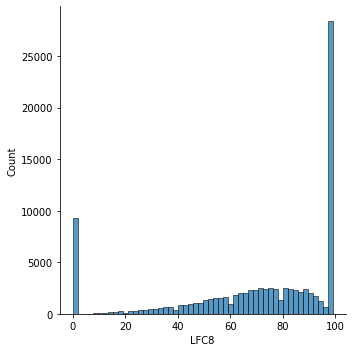

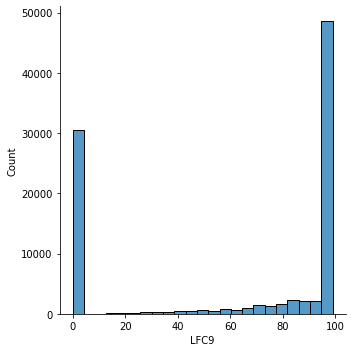

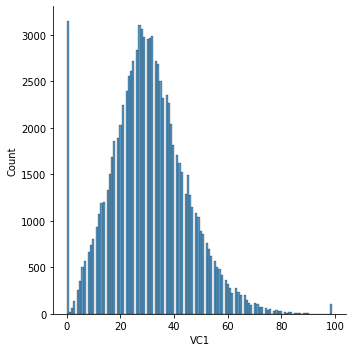

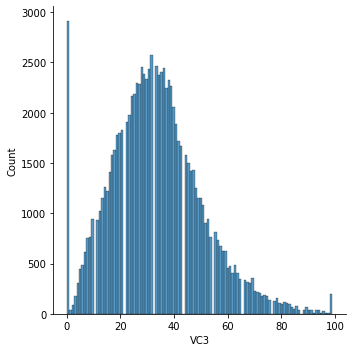

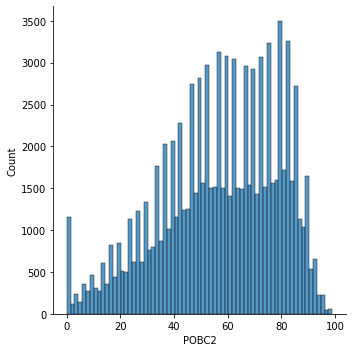

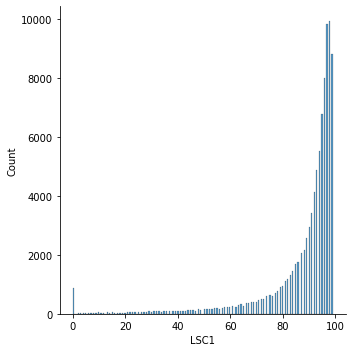

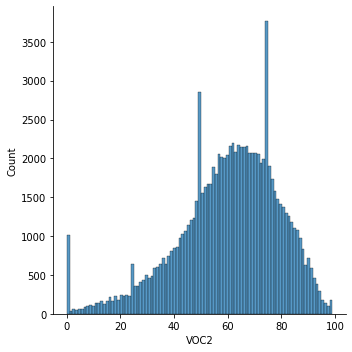

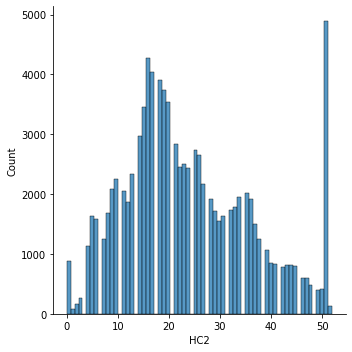

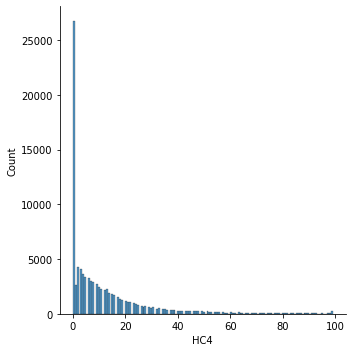

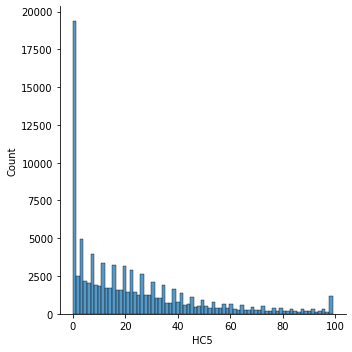

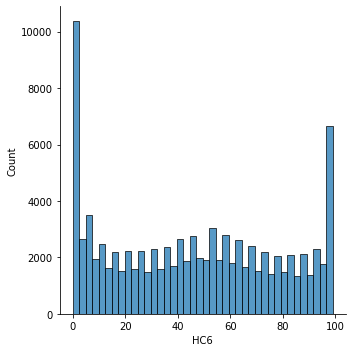

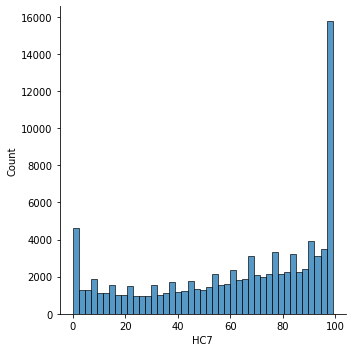

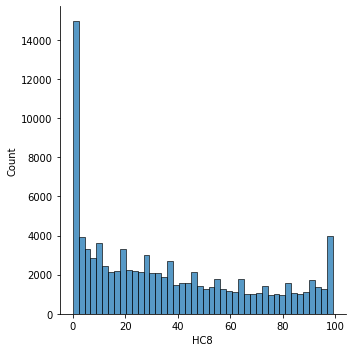

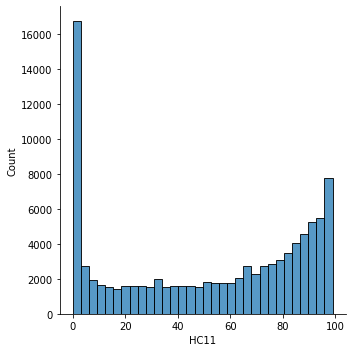

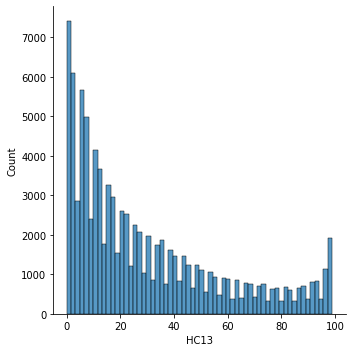

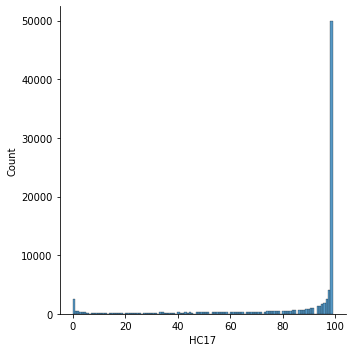

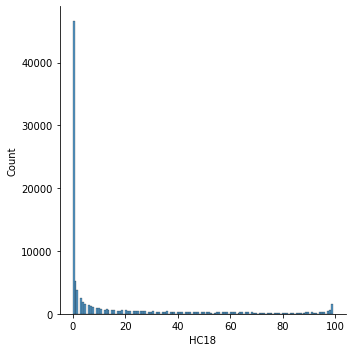

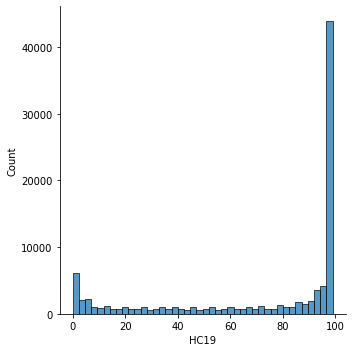

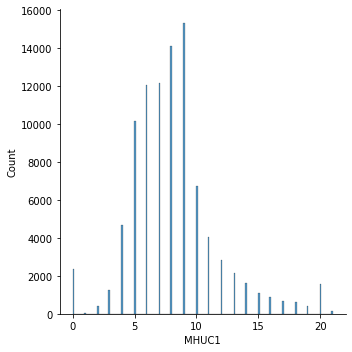

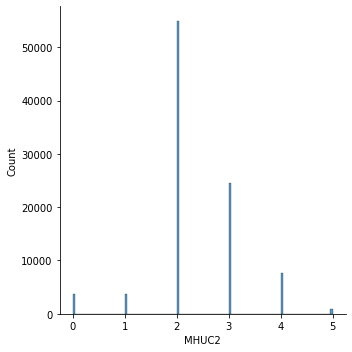

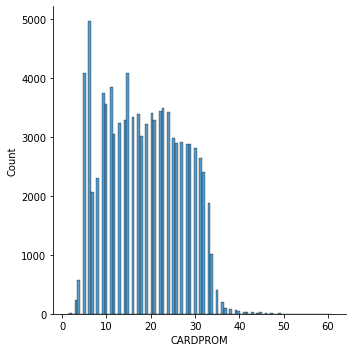

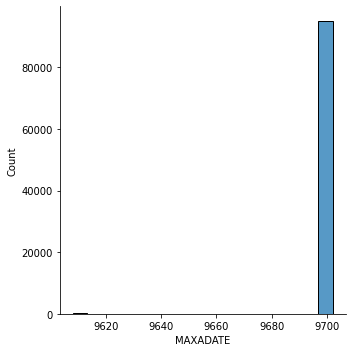

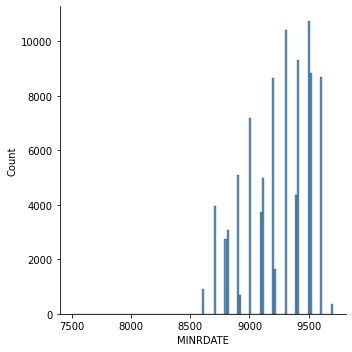

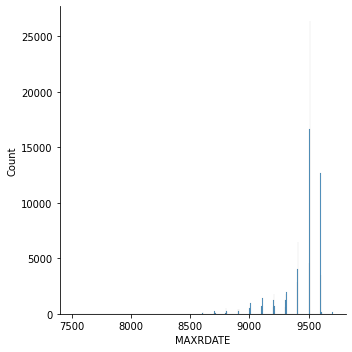

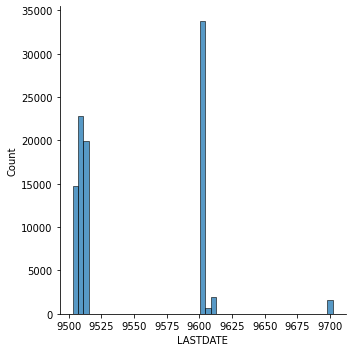

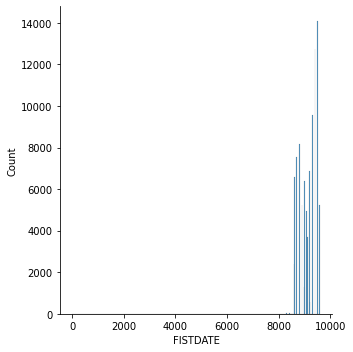

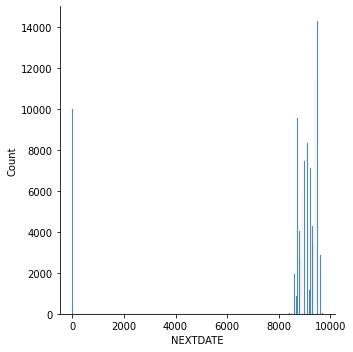

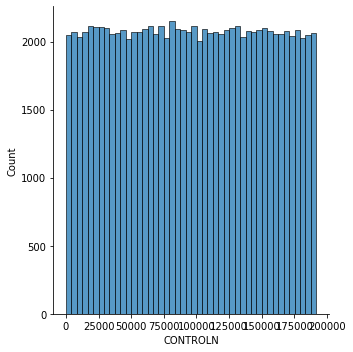

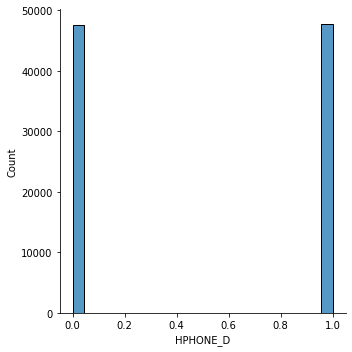

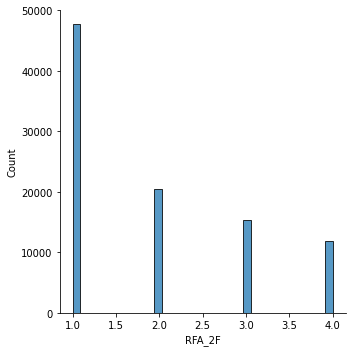

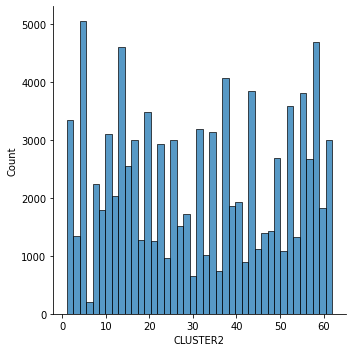

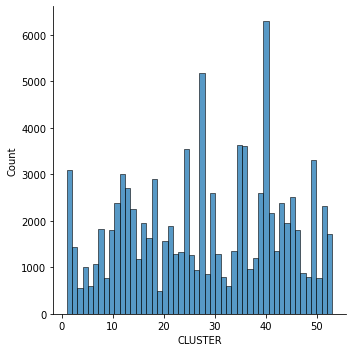

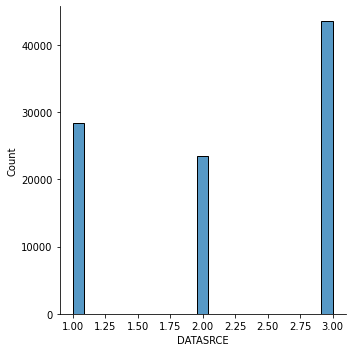

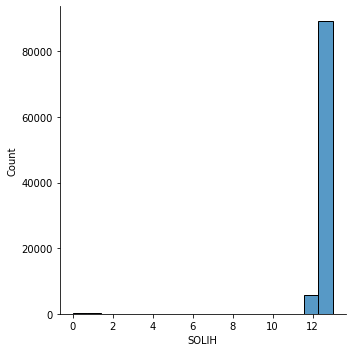

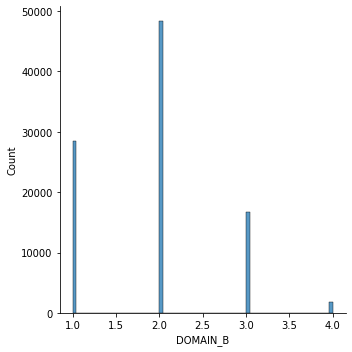

In [25]:
for column in donors.select_dtypes(include = np.number).columns: 
    sns.displot(donors[column])

In [26]:
'''These columns look categorical:
ODATEDW (which I happen to know is meant to be datetime)
INCOME
WEALTH1
WEALTH2
HV3
HV4
HVP6 ?
MHUC1
MHUC2
MAXADATE (also datetime)
MINRDATE (also datetime)
MAXRDATE (datetime)
LASTDATE (datetime)
FISTDATE (datetime)
NEXTDATE (datetime)
HPHONE_D (0/1)
RFA_2F
DATASRCE
SOLIH
DOMAIN_B'''

'These columns look categorical:\nODATEDW (which I happen to know is meant to be datetime)\nINCOME\nWEALTH1\nWEALTH2\nHV3\nHV4\nHVP6 ?\nMHUC1\nMHUC2\nMAXADATE (also datetime)\nMINRDATE (also datetime)\nMAXRDATE (datetime)\nLASTDATE (datetime)\nFISTDATE (datetime)\nNEXTDATE (datetime)\nHPHONE_D (0/1)\nRFA_2F\nDATASRCE\nSOLIH\nDOMAIN_B'

The things to check in the documentation:
- For the datetimes: is there anything useful to be gained from these columns? I might drop them
- For the others: are they really ordinal in nature? If so, I won't touch them (as they are already 'ordinally encoded'). If not, they need to be treated as object and onehot encoded. 

Having checked it, I will drop: 
   - All the dates
   - HPHONE_D (I don't care whether you do or don't have a phone
   - DATASRCE (It doesn't matter to me where the data comes from)
   - HVP6: part of a cluster of (already dropped) values, but it does not mean much in isolation
   - SOLIH: sollicitation limit (how often can they be contacted per year) - heavily skewed to 'doesn't matter' (which I have encoded as '13'), plus there was an instruction to drop this a while back in one of the labs.
   - RFA_2: see above - very partial information, not valuable in isolation of its brothers and sisters

The rest are neatly ordinally encoded, EXCEPT that DOMAIN_B is confusingly encoded (it was derived from an original 'Domain', but the value gets muddled in translation, because the original had two different scales (one for Urban, one for everything else). So I'm going to drop it as well. 

In [27]:
donors.drop(columns = ['ODATEDW','HVP6', 'MAXADATE', 
                       'MINRDATE', 'MAXRDATE',
                        'LASTDATE', 
                        'FISTDATE', 
                        'NEXTDATE', 
                        'HPHONE_D', 
                        'RFA_2F',
                        'DATASRCE',
                        'SOLIH',
                        'DOMAIN_B'], inplace = True)

In [28]:
donors

,DOB,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,CLUSTER2,STATE,CLUSTER,HOMEOWNR,GENDER,VETERANS,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,3712,60.000000,5.0,9.0,34,18,5.0,0,35,65,92,1,49,97,95,2,0,0,479,635,3,2,86,14,7,80,70,84,50,2,7,13,27,47,61,0,0,0,2,5,17,73,0.0,177.0,13,51,46,54,13,45,64,64,62,53,99,0,34,18,74,88,77,31,14,14,31,54,46,90,10,33,65,40,6,2,27,95515,39.0,IL,36,U,F,N,L,E,C,T
1,5202,46.000000,6.0,9.0,55,11,9.0,99,0,0,67,0,75,99,99,0,0,0,5468,5218,12,10,96,4,9,94,88,95,44,97,98,98,98,99,83,0,0,0,91,91,91,94,4480.0,13.0,2,66,56,44,2,71,83,81,64,57,99,99,55,11,39,50,92,10,26,56,97,99,0,96,4,99,0,99,20,4,12,148535,1.0,CA,14,H,M,N,L,G,A,S
2,0,61.611649,3.0,1.0,29,33,1.0,0,2,98,96,2,44,69,69,6,5,3,497,546,2,1,78,22,18,76,65,86,60,0,1,6,18,50,36,2,24,3,0,2,9,44,0.0,281.0,32,31,38,62,21,61,73,70,78,62,82,99,28,32,84,96,65,22,12,23,50,69,31,0,35,22,77,17,9,2,26,15078,60.0,NC,43,U,M,N,L,E,C,R
3,2801,70.000000,1.0,4.0,14,31,0.0,0,8,92,61,0,50,85,83,4,1,0,1000,1263,2,1,48,52,6,73,61,84,36,10,25,50,69,92,42,0,9,0,1,8,17,34,9340.0,67.0,27,26,46,54,17,43,81,68,33,31,0,99,14,31,67,56,43,38,10,19,39,45,55,45,17,23,77,22,16,2,27,172556,41.0,CA,44,U,F,N,L,E,C,R
4,2001,78.000000,3.0,2.0,9,53,0.0,99,0,0,2,98,57,99,98,0,0,0,576,594,4,3,90,10,0,82,49,92,1,0,1,2,16,67,45,0,0,0,25,58,74,83,5000.0,127.0,24,11,20,80,1,76,73,65,80,31,81,99,9,53,65,99,45,34,1,3,6,33,67,9,72,99,1,21,6,2,43,7112,26.0,FL,16,H,F,N,L,F,A,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,0,61.611649,5.0,9.0,47,11,6.0,99,0,0,78,10,48,54,38,32,24,14,988,1025,6,6,56,44,3,72,56,83,55,2,10,49,73,92,40,8,13,12,69,84,92,97,380.0,0.0,11,70,63,37,2,69,89,83,69,57,61,94,48,11,26,92,60,14,7,32,78,91,9,86,12,93,7,98,16,4,6,184568,12.0,other,27,U,M,N,L,G,C,C
95408,5001,48.000000,7.0,9.0,43,19,6.0,96,0,4,91,3,70,89,88,1,0,0,1679,1723,3,3,88,12,0,89,85,96,58,18,71,88,91,97,77,0,10,0,16,26,44,79,3360.0,201.0,8,61,83,17,3,61,88,87,48,43,99,0,43,19,51,94,84,7,55,90,94,94,6,82,16,69,31,67,18,5,4,122706,2.0,TX,24,H,M,N,L,F,A,C
95409,3801,60.000000,5.0,8.0,46,20,6.0,99,0,0,82,14,44,96,95,2,1,0,376,377,4,3,66,34,10,64,43,80,49,0,0,0,1,9,45,0,0,0,3,34,78,91,4040.0,61.0,21,26,43,57,25,69,70,70,77,24,62,0,46,20,82,92,42,51,0,0,0,0,99,97,0,99,0,99,5,2,14,189641,34.0,MI,30,U,M,N,L,E,B,C
95410,4005,58.000000,7.0,8.0,35,20,7.0,99,0,0,92,1,65,99,99,0,0,0,2421,2459,11,10,88,12,0,85,71,84,56,89,96,99,99,99,90,0,0,0,88,88,90,91,8735.0,13.0,7,46,43,57,24,52,88,85,70,54,99,99,35,20,50,83,85,25,0,6,17,99,1,99,1,99,0,99,12,3,36,4693,11.0,CA,24,H,F,N,L,F,A,C


Looking at it again, I'll also drop DOB, which seems to be some kind of encoded date of birth. Age is good, DOB is useless.

In [29]:
donors.drop(columns = ['DOB'], inplace = True)

###        Split the data into a training set and a test set.


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(donors, Y,
                                                   test_size = 0.2, random_state = 111)

In [31]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num = X_test.select_dtypes(include = np.number)

In [32]:
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat = X_test.select_dtypes(include = object)

###        Scale the features either by using normalizer or a standard scaler.

In [33]:
scaler = StandardScaler().fit(X_train_num)

X_train_num_scaled = pd.DataFrame(scaler.transform(X_train_num), columns = X_train_num.columns).reset_index(drop = True)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num), columns = X_train_num.columns).reset_index(drop = True)



In [34]:
X_train_num_scaled

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,CLUSTER2,CLUSTER
0,1.479135,-0.666896,-0.122899,0.949863,0.471532,0.008554,-1.229982,2.726751,-0.655592,0.529772,-0.387875,-0.390636,1.121058,1.025658,-0.733668,-0.687571,-0.641153,-0.120817,-0.092682,0.775453,0.951881,1.213120,-1.219438,0.200863,0.827893,1.250281,0.786783,0.220452,-0.358770,-0.344564,0.163827,0.815714,0.850112,1.696910,-0.545079,-0.595916,-0.618564,1.524743,1.025475,1.198750,0.928081,1.064637,0.405390,-0.175379,0.413784,1.730394,-1.668179,-0.489107,0.462072,0.285088,0.282233,0.908687,1.572471,-2.284934,-1.402377,0.928552,0.445838,-0.967914,0.494849,0.247549,-1.428233,2.161421,1.689771,1.657789,1.154114,-1.158660,-0.387606,-0.029572,0.577141,-0.569698,0.762670,0.253292,-0.383154,1.231738,0.655311,0.553846,0.953046
1,-0.001377,0.510444,-0.850453,0.021058,0.301904,-1.418518,0.855934,-0.437691,-0.655592,-3.584358,1.542768,1.056323,-1.966444,-1.937135,2.495692,2.580746,2.246199,0.683823,0.936523,-0.093257,0.059475,-2.659525,2.802729,-0.655893,-0.231422,-1.590218,-0.562016,-3.099397,0.695456,1.351219,1.419912,1.088011,0.681168,-1.668652,2.033068,-0.595916,2.586035,-0.155344,0.165762,0.530089,0.598976,0.338327,-1.272717,1.686264,-1.873734,0.165862,-0.110287,-0.856875,0.749584,0.079806,-0.252874,-0.983529,-1.029979,-0.624407,0.163339,-0.038991,0.269746,-1.335047,-2.756522,-1.567024,0.964556,-0.730028,-0.949064,-1.436111,-1.367493,1.435260,0.958951,-0.887123,0.577141,-0.569698,0.678397,-0.314206,-0.383154,0.182599,0.850566,0.767118,-1.268831
2,0.025505,0.510444,0.968433,1.414266,-1.450912,1.078857,-1.229982,2.055506,-0.107044,0.529772,-0.387875,1.056323,1.161155,1.215580,-0.817548,-0.731738,-0.641153,-0.202663,-0.214201,0.775453,0.951881,0.844296,-0.836375,-0.608295,0.827893,1.003281,0.644804,0.912087,-0.509374,-0.501581,-0.218459,0.543418,0.850112,1.650167,-0.545079,-0.595916,-0.618564,1.866983,1.426674,1.077176,0.763529,-0.499723,0.390798,-1.140676,0.237821,1.167162,-1.107338,3.293655,0.922091,1.379929,1.553112,0.664530,0.878484,0.612849,0.811992,1.412324,-1.549876,-0.646672,0.434639,1.154836,-1.348474,1.807366,2.820701,1.564034,1.154114,-1.126637,0.987005,-0.744197,0.086556,-0.010199,0.369397,0.537041,0.771801,-1.565966,0.617572,-0.779103,0.467010
3,-0.389818,0.510444,-1.214230,0.883520,-0.772402,-0.704982,-1.229982,2.726751,-0.655592,0.673288,-0.448208,1.056323,0.800278,0.911704,-0.482030,-0.466739,-0.445400,-0.573627,-0.605172,-0.527612,-0.386728,0.798194,-0.788492,-0.370308,0.960307,1.003281,0.857772,1.050414,-0.509374,-0.627195,-0.846502,-1.035900,-0.704173,0.388081,-0.545079,-0.457140,-0.449901,-0.808712,-0.923207,-0.837627,0.434424,-1.226033,0.201099,0.100420,-0.114105,-0.147045,0.201291,-0.804337,0.002054,0.421943,-0.052209,-0.861450,-0.278161,-1.210475,-1.402377,2.518088,-1.315086,-1.656289,0.555060,1.101466,-0.630637,-0.257955,-0.236997,1.564034,1.154114,-1.158660,-1.453631,1.828455,0.577141,-0.569698,-1.849785,-0.881704,-0.383154,0.532312,-0.790851,0.607164,1.022479
4,-1.497345,-1.255566,0.604656,0.220088,0.019192,-0.348214,-1.229982,1.192476,0.566173,-1.479454,2.327092,0.436198,0.158720,0.227983,-0.440090,-0.510905,-0.494338,-0.663976,-0.642155,-0.961967,-1.279134,-0.031659,0.073401,-0.513100,0.232028,-0.355219,0.431836,-1.439473,-0.471723,-0.564388,-0.737277,-0.872522,-1.075850,-0.500054,-0.427890,0.444905,-0.449901,-0.870937,-1.152464,-1.627863,-2.075003,0.128815,0.478351,2.031013,-1.228536,-0.898020,0.949079,0.561660,-0.630472,-0.946607,-1.256200,-0.800411,-0.682986,-0.722085,-0.037968,0.099229,0.034956,1.693806,-0.588941,-0.873216,-0.072320,-0.316964,-0.111338,-0.029793,-0.012129,0.058240,0.229566,0.077622,0.226723,-0.1

###        Encode the categorical features using One-Hot Encoding or Ordinal Encoding

In [35]:
encoder = OneHotEncoder().fit(X_train_cat)

In [36]:
encoded_train = encoder.transform(X_train_cat).toarray()

In [37]:
encoded_test = encoder.transform(X_test_cat).toarray()

In [38]:
X_train_enc = pd.DataFrame(encoded_train, columns = encoder.get_feature_names_out())

In [39]:
X_test_enc = pd.DataFrame(encoded_test, columns = encoder.get_feature_names_out())

In [40]:
X_train_enc

,STATE_CA,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_H,HOMEOWNR_U,GENDER_F,GENDER_M,GENDER_unknown,VETERANS_N,VETERANS_Y,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_1,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
76325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
76326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
76327,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [41]:
# Then re-combine the transformed data

In [42]:
X_train_tf = pd.concat([X_train_num_scaled, X_train_enc], axis = 1)

In [43]:
X_train_tf

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,CLUSTER2,CLUSTER,STATE_CA,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_H,HOMEOWNR_U,GENDER_F,GENDER_M,GENDER_unknown,VETERANS_N,VETERANS_Y,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_1,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,1.479135,-0.666896,-0.122899,0.949863,0.471532,0.008554,-1.229982,2.726751,-0.655592,0.529772,-0.387875,-0.390636,1.121058,1.025658,-0.733668,-0.687571,-0.641153,-0.120817,-0.092682,0.775453,0.951881,1.213120,-1.219438,0.200863,0.827893,1.250281,0.786783,0.220452,-0.358770,-0.344564,0.163827,0.815714,0.850112,1.696910,-0.545079,-0.595916,-0.618564,1.524743,1.025475,1.198750,0.928081,1.064637,0.405390,-0.175379,0.413784,1.730394,-1.668179,-0.489107,0.462072,0.285088,0.282233,0.908687,1.572471,-2.284934,-1.402377,0.928552,0.445838,-0.967914,0.494849,0.247549,-1.428233,2.161421,1.689771,1.657789,1.154114,-1.158660,-0.387606,-0.029572,0.577141,-0.569698,0.762670,0.253292,-0.383154,1.231738,0.655311,0.553846,0.953046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.001377,0.510444,-0.850453,0.021058,0.301904,-1.418518,0.855934,-0.437691,-0.655592,-3.584358,1.542768,1.056323,-1.966444,-1.937135,2.495692,2.580746,2.246199,0.683823,0.936523,-0.093257,0.059475,-2.659525,2.802729,-0.655893,-0.231422,-1.590218,-0.562016,-3.099397,0.695456,1.351219,1.419912,1.088011,0.681168,-1.668652,2.033068,-0.595916,2.586035,-0.155344,0.165762,0.530089,0.598976,0.338327,-1.272717,1.686264,-1.873734,0.165862,-0.110287,-0.856875,0.749584,0.079806,-0.252874,-0.983529,-1.029979,-0.624407,0.163339,-0.038991,0.269746,-1.335047,-2.756522,-1.567024,0.964556,-0.730028,-0.949064,-1.436111,-1.367493,1.435260,0.958951,-0.887123,0.577141,-0.569698,0.678397,-0.314206,-0.383154,0.182599,0.850566,0.767118,-1.268831,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.025505,0.510444,0.968433,1.414266,-1.450912,1.078857,-1.229982,2.055506,-0.107044,0.529772,-0.387875,1.056323,1.161155,1.215580,-0.817548,-0.731738,-0.641153,-0.202663,-0.214201,0.775453,0.951881,0.844296,-0.836375,-0.608295,0.827893,1.003281,0.644804,0.912087,-0.509374,-0.501581,-0.218459,0.543418,0.850112,1.650167,-0.545079,-0.595916,-0.618564,1.866983,1.426674,1.077176,0.763529,-0.499723,0.390798,-1.140676,0.237821,1.167162,-1.107338,3.293655,0.922091,1.379929,1.553112,0.664530,0.878484,0.612849,0.811992,1.412324,-1.549876,-0.646672,0.434639,1.154836,-1.348474,1.807366,2.820701,1.564034,1.154114,-1.126637,0.987005,-0.744197,0.086556,-0.010199,0.369397,0.537041,0.771801,-1.565966,0.617572,-0.779103,0.467010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.389818,0.510444,-1.214230,0.883520,-0.772402,-0.704982,-1.229982,2.726751,-0.655592,0.673288,-0.448208,1.056323,0.800278,0.911704,-0.482030,-0.466739,-0.445400,-0.573627,-0.605172,-0.527612,-0.386728,0.798194,-0.788492,-0.370308,0.960307,1.003281,0.857772,1.050414,-0.509374,-0.627195,-0.846502,-1.035900,-0.704173,0.388081,-0.545079,-0.457140,-0.449901,-0.808712,-0.923207,-0.837627,0.434424,-1.226033,0.201099,0.100420,-0.114105,-0.147045,0.201291,-0.804337,0.002054,0.421943,-0.052209,-0.861450,-0.278161,-1.210475,-1.402377,2.518088,-1.315086,-1.656289,0.555060,1.101466,-0.630637,-0.257955,-0.236997,1.564034,1.154114,-1.158660,-1.453631,1.828455,0.5771

In [44]:
# Just checking that nothing went wrong here by checking for NaNs again:

In [45]:
for item in X_train_tf.isna().sum():
    if item >0:
        print("SOME NANS FOUND")

In [46]:
# Looking good

In [47]:
X_test_tf = pd.concat([X_test_num_scaled, X_test_enc], axis = 1)

In [48]:
X_test_tf

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,CLUSTER2,CLUSTER,STATE_CA,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_H,HOMEOWNR_U,GENDER_F,GENDER_M,GENDER_unknown,VETERANS_N,VETERANS_Y,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_1,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
0,-0.001377,0.510444,0.968433,-0.775060,1.828550,0.008554,0.855934,-0.437691,-0.655592,0.673288,-0.448208,-1.561985,-0.402644,-0.303801,-0.398150,-0.422573,-0.543277,-0.575753,-0.581925,-0.527612,-0.386728,0.475473,-0.453311,2.580739,-0.628665,-0.355219,-0.349048,-0.817001,-0.509374,-0.627195,-0.819196,-0.899752,-0.704173,-1.014237,-0.486484,1.416338,-0.562343,-0.808712,-0.722607,-0.199359,0.598976,1.665239,-0.411775,0.927817,0.589747,0.103281,-0.047971,1.770042,0.462072,-2.041448,-1.991972,-0.434176,-1.203476,0.677968,0.811992,-0.868314,1.854577,-2.069315,0.133586,-1.353545,-0.471118,-0.375973,-0.027566,0.626489,1.028034,-0.998542,-1.425578,2.078574,0.436974,-0.420498,-0.248603,-0.881704,-1.538110,-1.682537,1.708207,0.927072,0.328143,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.001377,0.510444,-0.486676,0.684491,-0.433148,0.365321,-1.229982,-0.437691,1.812873,0.625449,-0.387875,0.642906,0.800278,0.911704,-0.691729,-0.643405,-0.592215,-0.434383,-0.492107,-0.527612,-0.832931,0.752091,-0.740609,-0.465503,0.761685,1.065031,0.715793,0.704596,-0.509374,-0.627195,-0.682665,-0.409619,-0.197341,0.575056,-0.545079,-0.110200,-0.562343,-0.653148,-0.751264,-0.776840,0.105318,0.086912,-0.222076,-0.382229,0.003204,-0.459951,0.512870,2.505579,1.267105,0.421943,0.349121,-0.312097,0.068833,-0.656966,0.811992,0.652111,-0.493321,0.546513,0.615270,1.314946,-0.152079,0.037091,0.014320,0.220219,0.050911,-0.005807,-0.135127,-0.672735,-0.719405,0.773099,-1.484603,-0.030457,0.771801,1.348309,0.156261,0.607164,1.091913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.112936,1.099114,1.332210,0.286431,0.188819,1.078857,-1.229982,-0.437691,1.812873,0.625449,-0.327542,0.711809,0.519596,0.645813,-0.733668,-0.687571,-0.641153,-0.254747,-0.249071,-0.527612,-0.832931,0.659885,-0.644843,-0.655893,0.960307,1.003281,0.786783,0.704596,-0.396421,-0.375968,-0.054622,0.162203,0.444646,0.855520,-0.545079,0.444905,-0.618564,-0.559810,-0.607979,-0.685659,-0.717444,-1.051439,0.069768,-0.244329,-0.231414,-0.084463,0.138976,3.136040,0.347068,0.421943,0.549786,0.969726,1.398974,-0.070897,0.811992,0.237450,0.152351,0.684188,0.615270,0.887987,-0.869916,1.217275,1.061477,0.970256,0.870433,-0.838423,-0.948672,0.470666,-1.700574,1.892096,-1.962149,-0.030457,-0.383154,0.765454,-1.205940,0.500528,1.091913,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.001377,0.510444,-1.941785,0.485461,-0.433148,0.008554,-1.229982,-0.437691,1.812873,0.673288,-0.448208,0.505101,0.720084,0.835735,-0.775608,-0.687571,-0.641153,-0.738381,-0.754163,-0.961967,-1.279134,0.475473,-0.453311,-0.084723,0.761685,1.003281,0.715793,0.704596,-0.509374,-0.658598,-0.901114,-1.144819,-1.413739,0.855520,-0.545079,0.097965,-0.618564,-0.902050,-1.209778,-1.506288,-1.293378,-1.226033,-0.674436,0.031470,0.355129,-0.960601,1.011395,-0.384030,1.152101,0.011378,0.081568,0.237256,1.051981,0.938443,0.811992,0.444781,-0.493321,0.775972,0.615270,0.567768,1.602633,-0.553000,-0.823405,-0.748577,-0.863171,0.922880,-1.4

###         Fit a logistic regression model on the training data.


In [49]:
reg = LogisticRegression()

In [50]:
logres = reg.fit(X_train_tf, y_train)

/Users/work/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###        Check the accuracy on the test data.

In [51]:
logres.score(X_train_tf, y_train)

0.949363937690786

In [52]:
logres.score(X_test_tf, y_test)

0.9487501965099827

This looks pretty good, but almost suspiciously so. I'll get a confusion matrix:

In [53]:
predictions = logres.predict(X_test_tf)

In [54]:
logres.score(X_test_tf, predictions)

1.0

(????)

In [55]:
confusion_matrix(y_test, predictions)

array([[18105,     0],
       [  978,     0]])

I suspect it's the imbalance that is at play here. Let's look at how a naïve model would do:

In [56]:
y_test.value_counts()

0    18105
1      978
Name: TARGET_B, dtype: int64

In [57]:
18105 / (18105 + 978)

0.9487501965099827

In [58]:
# This just so happens to be the exact same as the score for the test scores:
print(logres.score(X_test_tf, y_test))
print(18105 / (18105 + 978))

0.9487501965099827
0.9487501965099827


# BALANCE THE DATA

###     Check for the imbalance.

In [59]:
y_train.value_counts()

0    72464
1     3865
Name: TARGET_B, dtype: int64

In [60]:
72464 / (72464 + 3865)

0.949363937690786

This, unsurprisingly, is identical to the score above

###     Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

###     Each time fit the model and see how the accuracy of the model has changed.


In [61]:
from sklearn.utils import resample

First I have to re-concatenate the X and y for the training data, to make the resampling consistent throughout the data

In [62]:
y_train.reset_index(drop = True, inplace = True)

In [63]:
Xy = pd.concat([X_train_tf, y_train], axis = 1)

In [64]:
Xy

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,CLUSTER2,CLUSTER,STATE_CA,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_H,HOMEOWNR_U,GENDER_F,GENDER_M,GENDER_unknown,VETERANS_N,VETERANS_Y,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_1,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,1.479135,-0.666896,-0.122899,0.949863,0.471532,0.008554,-1.229982,2.726751,-0.655592,0.529772,-0.387875,-0.390636,1.121058,1.025658,-0.733668,-0.687571,-0.641153,-0.120817,-0.092682,0.775453,0.951881,1.213120,-1.219438,0.200863,0.827893,1.250281,0.786783,0.220452,-0.358770,-0.344564,0.163827,0.815714,0.850112,1.696910,-0.545079,-0.595916,-0.618564,1.524743,1.025475,1.198750,0.928081,1.064637,0.405390,-0.175379,0.413784,1.730394,-1.668179,-0.489107,0.462072,0.285088,0.282233,0.908687,1.572471,-2.284934,-1.402377,0.928552,0.445838,-0.967914,0.494849,0.247549,-1.428233,2.161421,1.689771,1.657789,1.154114,-1.158660,-0.387606,-0.029572,0.577141,-0.569698,0.762670,0.253292,-0.383154,1.231738,0.655311,0.553846,0.953046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
1,-0.001377,0.510444,-0.850453,0.021058,0.301904,-1.418518,0.855934,-0.437691,-0.655592,-3.584358,1.542768,1.056323,-1.966444,-1.937135,2.495692,2.580746,2.246199,0.683823,0.936523,-0.093257,0.059475,-2.659525,2.802729,-0.655893,-0.231422,-1.590218,-0.562016,-3.099397,0.695456,1.351219,1.419912,1.088011,0.681168,-1.668652,2.033068,-0.595916,2.586035,-0.155344,0.165762,0.530089,0.598976,0.338327,-1.272717,1.686264,-1.873734,0.165862,-0.110287,-0.856875,0.749584,0.079806,-0.252874,-0.983529,-1.029979,-0.624407,0.163339,-0.038991,0.269746,-1.335047,-2.756522,-1.567024,0.964556,-0.730028,-0.949064,-1.436111,-1.367493,1.435260,0.958951,-0.887123,0.577141,-0.569698,0.678397,-0.314206,-0.383154,0.182599,0.850566,0.767118,-1.268831,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.025505,0.510444,0.968433,1.414266,-1.450912,1.078857,-1.229982,2.055506,-0.107044,0.529772,-0.387875,1.056323,1.161155,1.215580,-0.817548,-0.731738,-0.641153,-0.202663,-0.214201,0.775453,0.951881,0.844296,-0.836375,-0.608295,0.827893,1.003281,0.644804,0.912087,-0.509374,-0.501581,-0.218459,0.543418,0.850112,1.650167,-0.545079,-0.595916,-0.618564,1.866983,1.426674,1.077176,0.763529,-0.499723,0.390798,-1.140676,0.237821,1.167162,-1.107338,3.293655,0.922091,1.379929,1.553112,0.664530,0.878484,0.612849,0.811992,1.412324,-1.549876,-0.646672,0.434639,1.154836,-1.348474,1.807366,2.820701,1.564034,1.154114,-1.126637,0.987005,-0.744197,0.086556,-0.010199,0.369397,0.537041,0.771801,-1.565966,0.617572,-0.779103,0.467010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,-0.389818,0.510444,-1.214230,0.883520,-0.772402,-0.704982,-1.229982,2.726751,-0.655592,0.673288,-0.448208,1.056323,0.800278,0.911704,-0.482030,-0.466739,-0.445400,-0.573627,-0.605172,-0.527612,-0.386728,0.798194,-0.788492,-0.370308,0.960307,1.003281,0.857772,1.050414,-0.509374,-0.627195,-0.846502,-1.035900,-0.704173,0.388081,-0.545079,-0.457140,-0.449901,-0.808712,-0.923207,-0.837627,0.434424,-1.226033,0.201099,0.100420,-0.114105,-0.147045,0.201291,-0.804337,0.002054,0.421943,-0.052209,-0.861450,-0.278161,-1.210475,-1.402377,2.518088,-1.315086,-1.656289,0.555060,1.101466,-0.630637,-0.257955,-0.236997,1.564034,1.154114,-1.158660,-1.453631,

In [65]:
category_0 = Xy[Xy['TARGET_B'] == 0]
category_1 = Xy[Xy['TARGET_B'] == 1]

## First, undersampling

In [66]:
under = resample(category_0, replace=False, n_samples = len(category_1))

In [67]:
len(under)

3865

In [68]:
undersampled = pd.concat([under, category_1], axis = 0)

In [69]:
undersampled

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,CLUSTER2,CLUSTER,STATE_CA,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_H,HOMEOWNR_U,GENDER_F,GENDER_M,GENDER_unknown,VETERANS_N,VETERANS_Y,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_1,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
15501,0.648489,0.510444,1.332210,0.817177,0.810786,-0.704982,-1.229982,2.439075,-0.406252,0.529772,-0.387875,0.367295,0.960668,0.721782,-0.775608,-0.731738,-0.641153,0.331992,0.443054,1.209809,0.059475,1.074811,-1.075789,-0.417905,1.225135,1.620781,0.715793,0.635433,0.356598,0.628941,1.146850,1.115240,0.782535,1.696910,-0.545079,-0.248976,-0.618564,0.560249,0.280391,0.104577,-0.264925,1.665239,-0.411775,-0.933827,1.058981,2.293625,-2.229020,-0.121338,-0.170453,0.285088,0.416009,-1.349764,-0.798651,0.677968,0.811992,0.790332,0.798023,-1.610398,-0.227678,1.368315,-1.587753,3.518632,2.653156,1.376525,1.059554,-1.030565,-1.425578,2.400156,0.191681,-0.122099,0.397488,1.388288,0.771801,-0.866540,-0.994154,-0.939056,0.467010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
22219,1.756017,-0.666896,-1.214230,-0.045285,-0.320063,-1.061750,-1.229982,1.671937,0.192163,0.625449,-0.448208,-0.252831,-0.041767,0.076045,-0.104572,-0.069241,-0.053895,-0.678857,-0.707669,-0.961967,-0.832931,0.152753,-0.118131,0.343655,-0.363836,-0.231719,-0.136080,0.358779,-0.509374,-0.627195,-0.873808,-1.144819,-1.346161,0.060873,-0.017730,0.236741,0.056088,-0.902050,-1.123807,-1.293532,-0.964273,-1.226033,1.499808,1.065717,0.061858,-0.647695,0.699817,-0.541645,-1.953026,-0.262332,-0.520428,0.481413,0.531491,-0.331372,0.521217,-0.108102,-0.317229,0.959538,0.314218,-0.286149,0.406238,-0.553000,-0.613974,-0.279805,-0.421890,0.474549,-0.303447,-0.101034,-0.474112,0.549299,-0.080057,0.253292,-0.383154,1.348309,-1.526520,1.246979,0.536444,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
7176,1.063812,0.510444,1.332210,-1.969238,-1.846709,1.435625,-1.229982,-0.437691,1.812873,0.147062,0.275784,0.849615,1.040863,0.987673,-0.775608,-0.687571,-0.641153,1.155766,1.025284,0.341098,0.505678,0.613782,-0.596960,-0.655893,1.092721,1.126781,0.786783,0.773760,1.787334,1.790867,1.529136,1.278618,0.850112,1.369703,-0.545079,-0.595916,-0.618564,0.653587,0.223077,0.317333,0.146457,0.519904,-0.440960,-0.589078,0.120512,2.606531,-2.540598,-0.961952,1.209603,1.311501,1.553112,-0.434176,-0.856483,-2.284934,-1.402377,-2.112299,-1.960758,-0.508997,-2.696311,1.795274,-1.747272,2.869531,1.605999,0.470231,0.744353,-0.710328,-1.453631,2.471618,-1.385198,1.556397,-1.512694,2.807033,-2.693065,1.464880,-1.038726,-1.418918,0.467010,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
52404,0.094726,0.510444,0.240879,-0.775060,0.754244,0.365321,-1.229982,2.183362,-0.206780,0.577611,-0.448208,-1.148568,-0.162060,-0.113878,0.147066,0.063258,-0.004957,-0.207978,-0.111703,-0.527612,-0.386728,-0.492688,0.552231,0.296058,-0.562458,-0.416969,-0.703995,-0.263693,-0.283468,-0.124741,0.191133,0.162203,0.309491,-0.874005,-0.076325,-0.040812,0.056088,-0.590923,-0.607979,-0.412115,-0.264925,0.938929,0.638866,0.445169,-0.407376,0.979418,-0.920391,-0.699260,-2.643055,-0.467615,-0.587316,0.908687,-0.220328,0.710527,0.811992,-0.660984,0.445838,-1.564506,0.254007,-0.339518,-0.311599,0.863220,0.558842,0.345225,0.2

In [70]:
X_us = undersampled.drop(columns = ['TARGET_B'])

In [71]:
y_us = undersampled['TARGET_B']

In [72]:
regr_us = LogisticRegression().fit(X_us, y_us)

/Users/work/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
regr_us.score(X_us, y_us)

0.588745148771022

In [74]:
regr_us.score(X_test_tf, y_test)

0.5827176020541843

Neat!

## Oversampling

Note: this first bit contains a big error, but I leave it in for your entertainment

In [75]:
oversampled = resample(category_1, replace=True, n_samples = len(category_0))

In [76]:
X_os = oversampled.drop(columns = ['TARGET_B'])

In [77]:
X_os

,AGE,INCOME,WEALTH1,VIETVETS,WWIIVETS,WEALTH2,POP90C1,POP90C2,POP90C3,ETH1,ETH2,HHN3,DW1,DW2,DW4,DW5,DW6,HV1,HV2,HV3,HV4,HU1,HU2,HU5,HHD2,HHD3,HHD5,ETHC2,HVP1,HVP2,HVP3,HVP4,HVP5,HUR2,HUPA2,HUPA3,HUPA6,RP1,RP2,RP3,RP4,MSA,ADI,IC6,HHAS3,MC1,MC2,PEC2,TPE13,LFC2,LFC4,LFC6,LFC7,LFC8,LFC9,VC1,VC3,POBC2,LSC1,VOC2,HC2,HC4,HC5,HC6,HC7,HC8,HC11,HC13,HC17,HC18,HC19,MHUC1,MHUC2,CARDPROM,CONTROLN,CLUSTER2,CLUSTER,STATE_CA,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,HOMEOWNR_H,HOMEOWNR_U,GENDER_F,GENDER_M,GENDER_unknown,VETERANS_N,VETERANS_Y,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_1,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U
7636,-0.001377,0.510444,0.240879,0.087402,0.754244,-0.704982,-1.229982,-0.437691,1.812873,0.481933,-0.448208,-0.115025,0.118622,0.227983,-0.607849,-0.555072,-0.592215,-0.541739,-0.539658,-0.527612,-0.386728,0.244959,-0.213896,2.104764,0.364442,0.447531,0.431836,0.151288,-0.471723,-0.564388,-0.600746,-0.654685,-0.569018,-0.313078,-0.545079,0.930622,-0.506122,-0.808712,-0.980521,-0.624871,0.352147,1.246214,0.332429,-0.106430,0.061858,-0.272207,0.325923,0.666737,-0.342961,0.011378,0.014679,-0.556254,0.126665,-0.852322,0.811992,0.030119,0.739326,0.041704,0.494849,0.674508,0.884796,-0.139936,-0.320770,-0.154799,-0.327330,0.378477,-0.920619,-0.279691,-0.719405,0.661199,-1.877876,-0.597955,-0.383154,-0.400256,1.462815,0.660482,1.230780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12317,-0.001377,0.510444,1.332210,-1.969238,-1.846709,1.078857,0.855934,-0.437691,-0.655592,0.434095,-0.387875,-0.390636,-0.162060,-0.189847,0.356765,0.239924,0.141858,0.371321,0.394446,-0.093257,0.059475,-0.769305,0.839528,-0.417905,-0.496250,-0.725719,-0.349048,0.289615,0.281296,0.785958,1.119544,1.115240,0.816323,-0.593542,-0.017730,-0.248976,0.280973,-0.062006,0.079791,0.621270,0.557838,1.190344,-0.878727,0.376219,-0.231414,0.916837,-0.858075,-0.173876,0.174561,0.285088,0.014679,-0.190019,-0.567322,-0.298813,0.029135,0.444781,-0.962901,-0.004188,0.374428,-0.499628,0.406238,1.099256,0.391297,-0.311056,-0.421890,0.474549,0.650365,-0.422616,0.577141,-0.569698,0.762670,0.537041,1.926757,-0.050543,1.375156,-0.459195,-0.505061,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
56505,-0.001377,-1.255566,0.968433,0.220088,-0.659317,-1.775286,-1.229982,1.639973,0.217097,0.481933,-0.387875,0.780712,0.279012,0.417905,-0.775608,-0.731738,-0.641153,-0.342970,-0.399119,-0.093257,-0.386728,0.936502,-0.932141,-0.608295,0.960307,1.126781,0.857772,0.704596,-0.509374,-0.658598,-0.737277,-0.110093,0.613591,0.575056,-0.545079,0.861234,-0.618564,-0.248683,-0.264094,-0.016997,-0.100372,1.763012,0.595089,-0.795927,0.296475,-0.647695,0.699817,-0.646722,1.094598,0.695654,0.884228,-0.067941,0.878484,-0.429050,0.811992,0.168340,-0.728111,-0.050079,0.675481,1.154836,-0.949676,0.391146,0.935819,1.157765,0.964993,-0.934494,0.930898,-0.815660,0.401932,-0.345898,-0.164330,-0.314206,-0.383154,-0.633398,0.335909,-0.832421,0.814178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1787,-0.459038,0.510444,0.604656,-1.969238,0.188819,-1.418518,0.855934,-0.437691,-0.655592,-3.680035,2.327092,0.160586,-0.923911,-1.101475,1.237500,1.034920,0.875930,-0.149516,-0.127553,-0.527612,-0.386728,-2.244598,2.371782,-0.655893,-1.224529,-1.960718,-0.491026,-3.168561,-0.396421,-0.375968,0.163827,0.461729,0.579802,-1.575164,0.978372,-0.595916,1.180509,-0.279795,-0.264094,-0.290541,-0.511754,0.338327,-1.272717,3.341059,-2.049696,1.104581,-1.045022,-0.909413,0.577077,-1.015035,-1.189312,-1.166647,-1.492637,0.059340,0.811992,-2.112299,0.152351,-0.922022,-2.094205,-2.420941,0.166959,-0.730028,-0.949064,-1.436111,-1.08381

In [78]:
y_os = oversampled['TARGET_B']

In [79]:
y_os

7636     1
12317    1
56505    1
1787     1
69303    1
        ..
5541     1
46742    1
27903    1
30603    1
28540    1
Name: TARGET_B, Length: 72464, dtype: int64

In [80]:
regr_os = LogisticRegression().fit(X_os, y_os)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

Yikes, this gives me an error - I think it is trying to say that the y_os only contains ones or only zeroes. Let's check:

In [81]:
y_os.value_counts()

1    72464
Name: TARGET_B, dtype: int64

##### D'ohhh - forgot to concatenate with the other group.

In [82]:
os = resample(category_1, replace=True, n_samples = len(category_0))

In [83]:
oversampled = pd.concat([os, category_0], axis = 0)

In [84]:
oversampled['TARGET_B'].value_counts()

1    72464
0    72464
Name: TARGET_B, dtype: int64

In [85]:
X_os = oversampled.drop(columns = ['TARGET_B'])
y_os = oversampled['TARGET_B']

In [86]:
regr_os = LogisticRegression().fit(X_os, y_os)

/Users/work/Library/Python/3.10/lib/python/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
regr_os.score(X_os,y_os)

0.5847386288363877

In [88]:
regr_os.score(X_test_tf,y_test)

0.6029450296075041

In [89]:
# Nice!

I'll also try both models with generated predictions!

In [90]:
pred_us = regr_us.predict(X_test_tf)

In [91]:
pred_os = regr_os.predict(X_test_tf)

In [92]:
confusion_matrix(y_test, pred_us)

array([[10573,  7532],
       [  431,   547]])

In [93]:
confusion_matrix(y_test, pred_os)

array([[10956,  7149],
       [  428,   550]])